## EDA of each of the years 'xxxx_Detils.xlsx' can be done in the same way as the following notebook shows as there is minimal difference in the xlsx. The only notable difference is for some of the years we have worked hours given in a format like this '0745' which needs to be converted into a decimal format which is shown by the code in the last cell of this notebook. 

In [1]:
 import pandas as pd

# Provide the file path
file_path = '2012_Details.xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)
df.head()


,Job No.,Emp. ID,Employee,Rank,Location,Detail\nDate,Start\nTime,End \nTime,Hours\nWorked,Hours\nPaid,Type,Customer No.,Customer,Address,City/State/Zip
0,54854,10249,"CLARK,ROBERT M",9,TREMONT\SCHOOL,2012-12-03,830,1430,6.0,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210
1,54871,10799,"DIRIENZO,ROBERT",9,BEACON\TREMONT,2012-12-06,830,1430,6.0,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210
2,50025,7469,"REED,WALTER R",9,HARRISN AV,2012-11-26,830,1430,6.0,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210
3,51064,10397,"DONOVAN,TIMOTHY R",9,HARRISN AV T,2012-11-27,830,1430,6.0,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210
4,52131,11319,"HAYWARD,PAUL E.",9,SCHOOL\TREMONT,2012-11-28,930,1430,5.0,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210


In [9]:
column_names = df.columns.tolist()
print(column_names)

['Job No.', 'Emp. ID', 'Employee', 'Rank', 'Location', 'Detail\nDate', 'Start\nTime', 'End \nTime', 'Hours\nWorked', 'Hours\nPaid', 'Type', 'Customer No.', 'Customer', 'Address', 'City/State/Zip']


## Converting the names of the dataframe to a consistent version without \n's

In [2]:
column_name_mapping = {
    'Job No.': 'Job_no',
    'Emp. ID': 'Emp_ID',
    'Detail\nDate': 'Detail_Date',
    'Start\nTime': 'Start_Time',
    'End \nTime': 'End_Time',
    'Hours\nWorked': 'Hours_Worked',
    'Hours\nPaid': 'Hours_Paid',
    'Customer No.': 'Customer_no'   
}

df.rename(columns=column_name_mapping, inplace=True)
df.head()

,Job_no,Emp_ID,Employee,Rank,Location,Detail_Date,Start_Time,End_Time,Hours_Worked,Hours_Paid,Type,Customer_no,Customer,Address,City/State/Zip
0,54854,10249,"CLARK,ROBERT M",9,TREMONT\SCHOOL,2012-12-03,830,1430,6.0,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210
1,54871,10799,"DIRIENZO,ROBERT",9,BEACON\TREMONT,2012-12-06,830,1430,6.0,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210
2,50025,7469,"REED,WALTER R",9,HARRISN AV,2012-11-26,830,1430,6.0,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210
3,51064,10397,"DONOVAN,TIMOTHY R",9,HARRISN AV T,2012-11-27,830,1430,6.0,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210
4,52131,11319,"HAYWARD,PAUL E.",9,SCHOOL\TREMONT,2012-11-28,930,1430,5.0,8,Z,1103,VERIZON,649 SUMMER ST.,BOSTON MA 02210


## Calculating the total overpaid hours and the average rank of the officer in the dataset. Then, we multiply the total overpaid hours with the average salary of the average rank that we find earlier

In [3]:
df['Overpaid_Hours'] = df['Hours_Paid'] - df['Hours_Worked']
total_difference = df['Overpaid_Hours'].sum()
print("Total overpaid hours:", total_difference)

average_rank = df['Rank'].mean()
print("Average Rank:", int(average_rank))

Total overpaid hours: 147413.13
Average Rank: 8


#### To find the average pay of a rank 8 officer we go through the '2022-FULL_Detail_B000400-020823' file and for every instance of a rank 8 officer we are summing up the pay_rate and then finding the average pay of a rank 8 officer

In [4]:
file_path = '2022-FULL_Detail_B000400-020823.xlsx'

# Read the Excel file into a Pandas DataFrame
df2 = pd.read_excel(file_path)
#df2.head()
# column_names = df2.columns.tolist()
# print(column_names)
# Step 1: Filter the DataFrame for rank 8 officers
rank_8_df = df2[df2['Emp_Rank'] == 8]

# Step 2: Sum up the pay_rate for rank 8 officers
total_pay = rank_8_df['Pay_Rate'].sum()

# Step 3: Calculate the average pay for rank 8 officers
num_rank_8_officers = len(rank_8_df)
average_pay_rank_8 = total_pay / num_rank_8_officers

# Now, 'average_pay_rank_8' contains the average pay of rank 8 officers in your dataset
print("Average Pay of Rank 8 Officers:", average_pay_rank_8)

Average Pay of Rank 8 Officers: 46.0


In [5]:
Overpaid_money = float(average_pay_rank_8 * total_difference)
print("The amount of overpaid money:", Overpaid_money, "$")

The amount of overpaid money: 6781003.98 $


### Therefore, from this analysis of financial excess of BPD spending we can conclude about the amount of money the state would save in the year of 2012 if the police officers were paid according to their actual worked hours(note this does not take inflation into account, as we calculate the avg salary from the 2022 dataset), which amounts to SIX MILLION SEVEN HUNDRED EIGHTY-ONE THOUSAND THREE

## Getting insights on which areas based on street names mostly call for overtime services

/var/folders/ry/qqr3x9d55rb8tlz6m6vx0jmc0000gn/T/ipykernel_35058/2674938308.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Street Name'] = df['Address'].str.replace(r'^\d+\s', '')


Top 5 street names with a count of the times an offcer has done overtime:
P.O. BOX 220801    15704
P.O. BOX 250       13870
SYLVAN ROAD         5462
ALLERTON ST.        5313
P.O. BOX 245        3662
Name: Street Name, dtype: int64


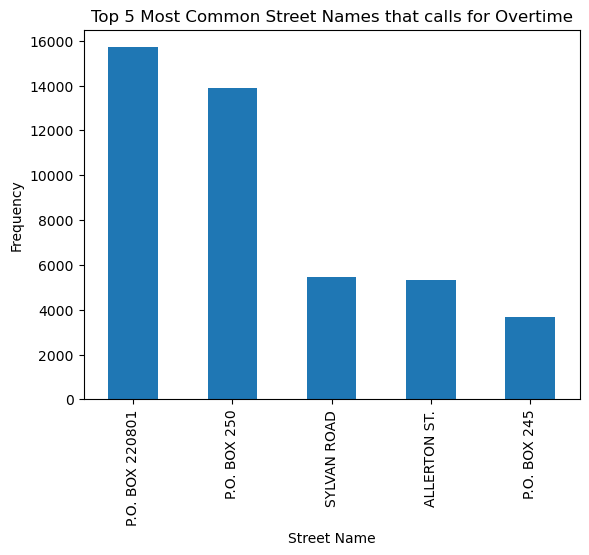

In [9]:
import matplotlib.pyplot as plt

# Step 1: Extract street names by removing the initial numbers
df['Street Name'] = df['Address'].str.replace(r'^\d+\s', '')
#df['Street Name'].head()

# Step 2: Count the occurrences of each street name
street_name_counts = df['Street Name'].value_counts()

# Step 3: Sort street names by count in descending order
top_5_streets = street_name_counts.head(5)

# Step 4: Display the top 5 most common street names
print("Top 5 street names with a count of the times an offcer has done overtime:")
print(top_5_streets)

top_5_streets.plot(kind='bar')
plt.title("Top 5 Most Common Street Names that calls for Overtime")
plt.xlabel("Street Name")
plt.ylabel("Frequency")
plt.show()


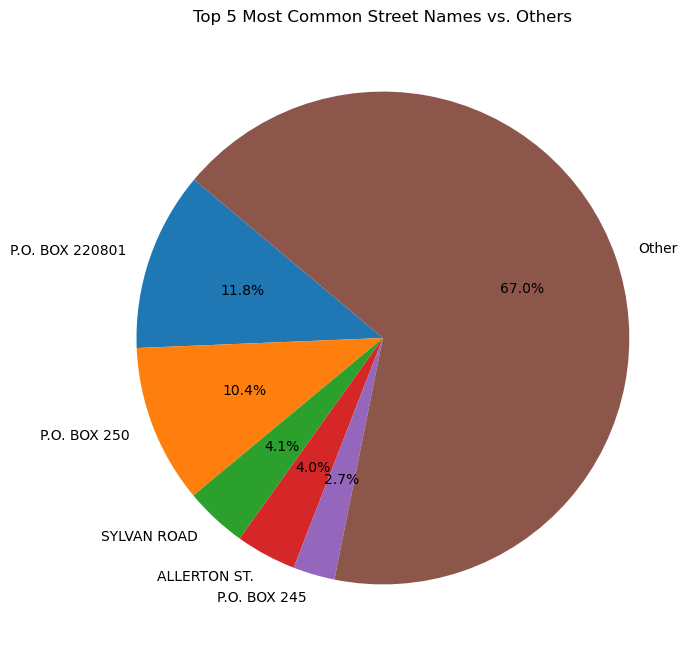

In [10]:
# Create a DataFrame with the top 5 streets and their counts
top_5_df = pd.DataFrame({'Street Name': top_5_streets.index, 'Frequency': top_5_streets.values})

# Calculate the sum of frequencies for the rest of the streets
rest_frequency = street_name_counts[5:].sum()

# Create a DataFrame for the rest of the streets
rest_df = pd.DataFrame({'Street Name': 'Other', 'Frequency': [rest_frequency]})

# Concatenate the top 5 and 'Other' DataFrames
combined_df = pd.concat([top_5_df, rest_df])

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(combined_df['Frequency'], labels=combined_df['Street Name'], autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Most Common Street Names vs. Others")
plt.show()

## Finding the names of the officers who have worked for less hours but paid more.

In [7]:
total_overpaid_hours = df.groupby('Employee')['Overpaid_Hours'].sum()

# Sort the officers by the total overpaid hours in descending order
top_5_overpaid_officers = total_overpaid_hours.sort_values(ascending=False).head(5)

# Print the names of the 5 most overpaid officers
print("The overpaid hours of the top 5 most overpaid officers:")
print(top_5_overpaid_officers)

The overpaid hours of the top 5 most overpaid officers:
Employee
BURCH,CHARLES K.       826.77
FITZPATRICK,DENIS J    641.50
RUSSELL,PATRICK        632.37
CHEN,WILLIAM L         601.77
DORCH,KENNETH C        549.25
Name: Overpaid_Hours, dtype: float64


## Converting the worked hours given in a format like this '0745' into a decimal format 

In [52]:
import pandas as pd

# Provide the file path
file_path = '2018_Details.xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)
df.head()

column_name_mapping = {
    'Detail\nDate': 'Detail_Date',
    'Start\nTime': 'Start_Time',
    'End \nTime': 'End_Time',
    'Hours\nWorked': 'Hours_Worked',
    'Hours\nPaid': 'Hours_Paid',  
}

df.rename(columns=column_name_mapping, inplace=True)

# Convert the 'Hours_Worked' column to a string
df['Hours_Worked'] = df['Hours_Worked'].astype(str)

# Extract the hours and minutes portions
df['Hours'] = df['Hours_Worked'].str[:-2]
df['Minutes'] = df['Hours_Worked'].str[-2:]

# Replace empty strings with 0
df['Hours'] = df['Hours'].replace('', '0')
df['Minutes'] = df['Minutes'].replace('', '0')

# Convert hours and minutes to decimals
df['Hours_Worked'] = df['Hours'].astype(int) + df['Minutes'].astype(int) / 100

# Drop the 'Minutes' column if it's no longer needed
df.drop('Minutes', axis=1, inplace=True)
df.drop('Hours', axis=1, inplace=True)

# Now, the 'Hours_Worked' column contains values in decimal format
df.head()

,Tracking_No,Emp. ID,Employee,Rank,Street,xStreet,Detail_Date,Start_Time,End_Time,Hours_Worked,Hours_Paid,Type,Customer No.,Customer,Customer Address,Customer Address 1,Customer Address 3,Customer_City,Customer_State,Customer_zip
0,1853658,103741,"CHEN,WILLIAM L",9,SUMMER ST,ATLANTIC AV,2018-01-01,1600,2345,7.45,8,C,95347,VEOLIA ENERGY,15 ELKINS STREET,NaN,NaN,SOUTH BOSTON,MA,02127
1,1847966,10072,"LYONS,WILLIE B",9,FRANCIS ST,NaN,2018-01-01,730,1500,7.30,8,S,149,Brigham & Women's Hospital,"10 Vining Street, Room 103",Security Dept; Attn: Karl Skulte,NaN,Boston,MA,02115
2,1854342,10731,"MOUSSALLI,ANTHONY J",9,WAVERLY ST,BLUE HILL AV,2018-01-02,1030,1500,4.30,8,C,416,VERIZON C/O SARAH KASANOVICH,146 LELAND ST,NaN,NaN,FRAMINGHAM,MA,01710
3,1854292,98657,"GORMAN III,JOSEPH P.",9,S HUNTINGTON AV,RIVERWAY,2018-01-02,830,1400,5.30,8,C,55,Boston Water & Sewer Commission,980 HARRISON AVE,NaN,NaN,BOSTON,MA,02119
4,1847955,8934,"BOYLE,ROBERT C",9,FOREST HILLS ST,NaN,2018-01-01,1930,2330,4.00,4,S,98837,FORESTVALE APARTMENTS,885 2ND AVENUE 31ST FLOOR STE C,NaN,NaN,NEW YORK,NY,10017
